<a href="https://colab.research.google.com/github/JinnnnyHong/machine-learning_math-/blob/main/BeamAndSmelt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K- 최근접 이웃 알고리즘을 통한 도미와 빙어 분류

In [2]:
#bream_length : 도미의 길이
#brean_weight : 도미의 무게
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

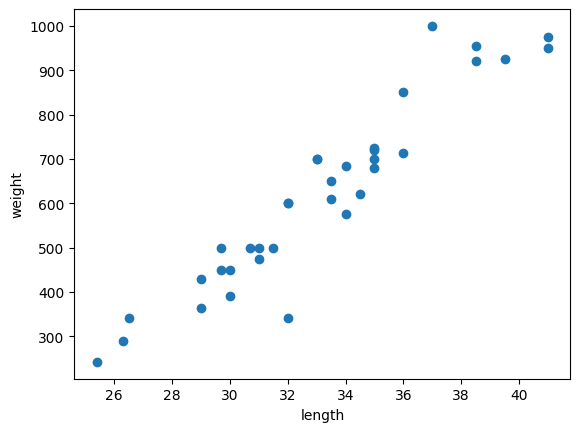

In [3]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
# 빙어 데이터

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

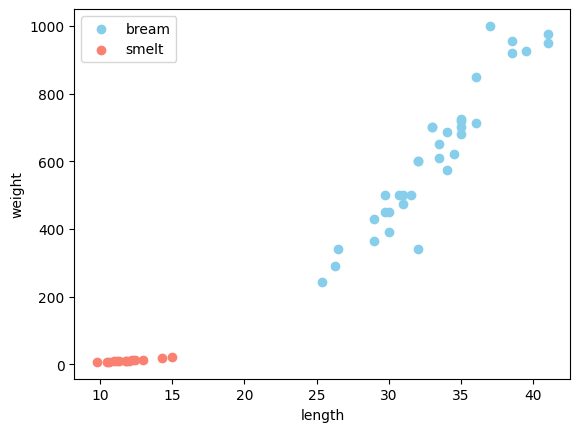

In [16]:
plt.scatter(bream_length, bream_weight, c='skyblue', label = 'bream')
plt.scatter(smelt_length, smelt_weight, c = 'salmon', label = 'smelt')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()



✔ zip 함수 통해서 2차원 리스트로 만듦




In [10]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w] for l,w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


🔯 도미를 1, 빙어로 0으로 놓았음

fish_target : 1 35개, 0 14개인 리스트

In [11]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


k-최근접 이웃 알고리즘을 통한 모델 평가 점수 = 1

-> 완벽하게 분류 성공 ✅

In [12]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

*길이가 30, 무게가 600인 물고기가 어떤 종류일지 예측해보기*

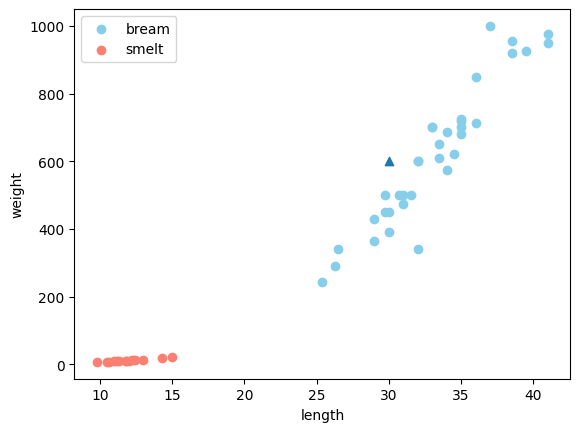

In [17]:
plt.scatter(bream_length, bream_weight, c = 'skyblue', label = 'bream')
plt.scatter(smelt_length, smelt_weight, c = 'salmon', label = 'smelt')
plt.scatter(30, 600, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

array([1]) : 아까 전에 1을 도미로 정해놨음


In [14]:
kn.predict([[30, 600]])

array([1])

KNeighborsClassifier 객체의 속성 중 _fit_X는 훈련 데이터를, _y는 훈련 데이터의 레이블을 나타냄.

 _fit_X는 모델이 학습한 특징 데이터(입력 데이터), _y는 각 특징 데이터의 클래스 레이블(타깃 값)

In [18]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [19]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
kn49 = KNeighborsClassifier(n_neighbors = 49)
# 입력 데이터 포인트 주변의 49개 이웃을 확인하고, 이 이웃들의 클래스 중 가장 많은 클래스를 현재 데이터 포인트의 클래스로 예측

kn49.fit(fish_data, fish_target)
# 생성한 k-NN 모델을 훈련 데이터인 fish_data와 fish_target에 맞춰 학습

kn49.score(fish_data, fish_target)
# 훈련된 모델을 훈련 데이터에 대해 평가하여 정확도를 계산

0.7142857142857143

In [22]:
print(35/49)
# '도미'가 차지하는 비율,  출력된 정확도와 35/49의 값이 유사하다면, 모델이 훈련 데이터에서 상당히 정확하게 작동하고 있음을 나타낼 수 있음

0.7142857142857143


↪ 도미가 차지하는 비율과 정확도가 같은 것을 확인할 수 있음

=> 모델이 정확하게 작동하고 있음을 나타냄 !

❔ n_neighbors의 기본값인 5부터 49까지 바꾸어 가며 점수가 1.0 아래로 내려가기 시작하는 이웃의 개수 찾기

-> 5부터 17까지는 1.0이지만, n이 18이 되는 순간부터 score가 1.0 아래로 내려간다.

In [26]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
  kn.n_neighbors = n
  score = kn.score(fish_data, fish_target)

  if score <1:
    print(n, score)
    break

18 0.9795918367346939
